In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Step 1: Load the dataset
df = pd.read_csv('student_spending (1).csv')

In [31]:
df.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [32]:
# Step 2: Preprocess the data
final_data = pd.get_dummies(df, columns=["gender", "year_in_school", "major", "preferred_payment_method"], drop_first=True)

In [33]:
# Step 3: Split the data into features and target variable
X = final_data.drop('financial_aid', axis=1)
y = final_data['financial_aid']

In [34]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Step 5: Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
# Step 6: Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
# Step 7: Make predictions on new training data
dt_pred = dt_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)

In [38]:
# Step 8: Evaluate Decision Tree Classifier
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_pred))  # Print classification report including precision, recall, F1-score, and support
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))  # Print confusion matrix

Decision Tree Classifier:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       0.0
          37       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       0.0
          44       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       0.0
          50       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       0.0
          70       0.00      0.00      0.00       1.0
 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

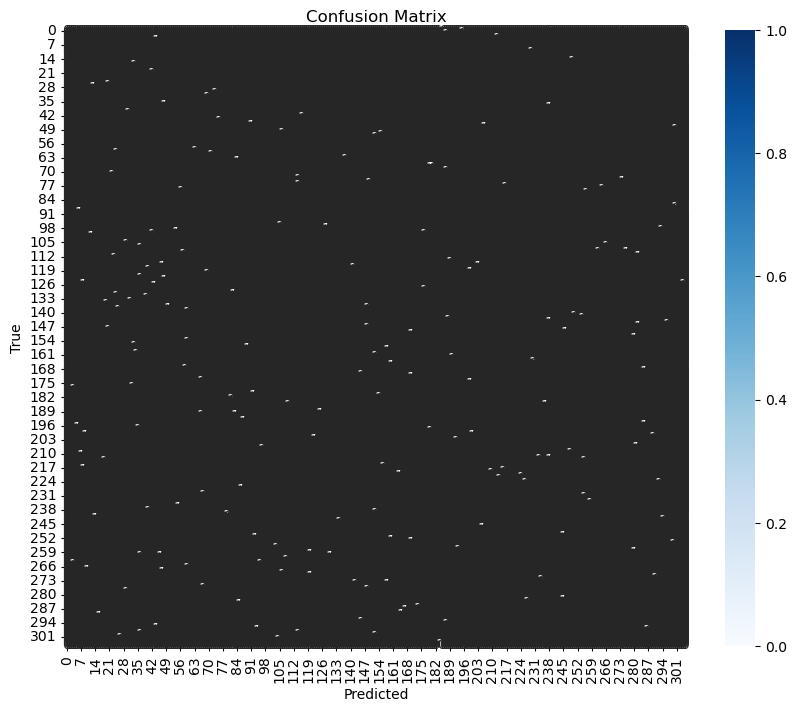

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming rf_pred and y_test are your predicted and true labels, respectively
cm = confusion_matrix(y_test, rf_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

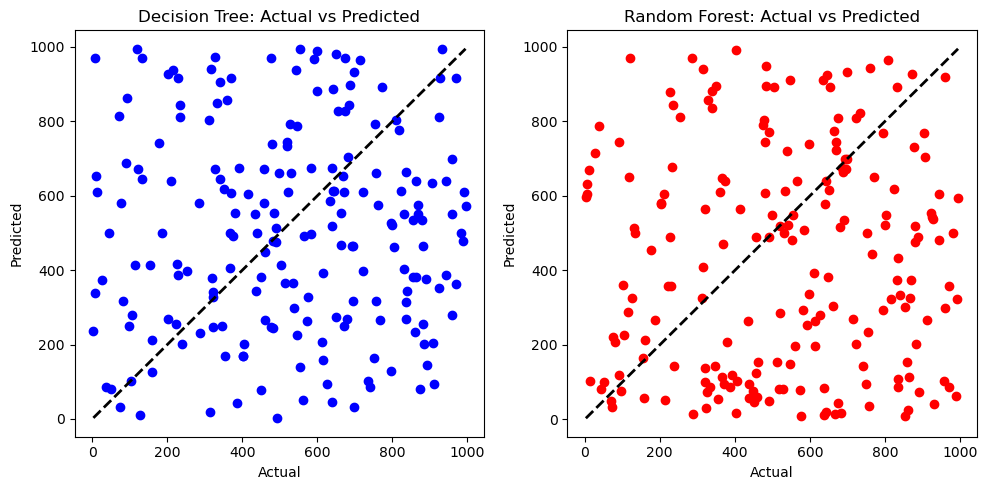

In [40]:
import matplotlib.pyplot as plt

# Assuming dt_pred and rf_pred are your predicted labels for Decision Tree and Random Forest models, respectively
# Plotting scatter plot for Decision Tree
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, dt_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs Predicted')

# Plotting scatter plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()